# Basball Player Data Analysis
## 1. Build a DataFrame

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
mlb = pd.read_csv('./Master.csv')

In [3]:
mlb.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [6]:
mlb.columns

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID'],
      dtype='object')

In [7]:
mlb['start'] = pd.to_datetime(mlb.debut,format='%Y-%m-%d').fillna(0)
mlb['end'] = pd.to_datetime(mlb.finalGame,format='%Y-%m-%d').fillna(0)
mlb_select = mlb[['playerID','start','end']]
mlb_select.head()

,playerID,start,end
0,aardsda01,2004-04-06,2015-08-23
1,aaronha01,1954-04-13,1976-10-03
2,aaronto01,1962-04-10,1971-09-26
3,aasedo01,1977-07-26,1990-10-03
4,abadan01,2001-09-10,2006-04-13


In [10]:
mlb_select['StartPeriod'] = mlb_select.start.apply(lambda x: (int(x.strftime('%Y'))//10 )*10)
mlb_select.head()

,playerID,start,end,StartPeriod
0,aardsda01,2004-04-06,2015-08-23,2000
1,aaronha01,1954-04-13,1976-10-03,1950
2,aaronto01,1962-04-10,1971-09-26,1960
3,aasedo01,1977-07-26,1990-10-03,1970
4,abadan01,2001-09-10,2006-04-13,2000


In [11]:
mlb_select['EndPeriod'] = mlb_select.end.apply(lambda x: (int(x.strftime('%Y'))//10 )*10)
mlb_select.head()

,playerID,start,end,StartPeriod,EndPeriod
0,aardsda01,2004-04-06,2015-08-23,2000,2010
1,aaronha01,1954-04-13,1976-10-03,1950,1970
2,aaronto01,1962-04-10,1971-09-26,1960,1970
3,aasedo01,1977-07-26,1990-10-03,1970,1990
4,abadan01,2001-09-10,2006-04-13,2000,2000


## 2. Analysis of Each Cohort

In [12]:
mlb_select['StartPeriod'].min()

1870

In [13]:
mlb_select['EndPeriod'].max()

2010

In [14]:
for r in range(1870,2011,10):
    mlb_select[r] = [start <= r <= end for start,end in zip(mlb_select['StartPeriod'],mlb_select['EndPeriod'])]

In [15]:
mlb_select.head()

,playerID,start,end,StartPeriod,EndPeriod,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
0,aardsda01,2004-04-06,2015-08-23,2000,2010,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1,aaronha01,1954-04-13,1976-10-03,1950,1970,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False
2,aaronto01,1962-04-10,1971-09-26,1960,1970,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
3,aasedo01,1977-07-26,1990-10-03,1970,1990,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False
4,abadan01,2001-09-10,2006-04-13,2000,2000,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [16]:
r = [1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]
grouped = mlb_select.groupby(['StartPeriod'])[r]

In [17]:
cohorts = grouped.agg({'playerID': np.sum})

In [18]:
cohorts

playerID                                                        \
                1870   1880   1890    1900    1910    1920    1930    1940   
StartPeriod                                                                  
1870           448.0  155.0   29.0     2.0     0.0     0.0     0.0     0.0   
1880             0.0  933.0  327.0    37.0     4.0     0.0     0.0     0.0   
1890             0.0    0.0  813.0   244.0    51.0     1.0     1.0     0.0   
1900             0.0    0.0    0.0  1084.0   385.0    56.0     4.0     0.0   
1910             0.0    0.0    0.0     0.0  1546.0   418.0    63.0     0.0   
1920             0.0    0.0    0.0     0.0     0.0  1206.0   403.0    71.0   
1930             0.0    0.0    0.0     0.0     0.0     0.0  1038.0   467.0   
1940             0.0    0.0    0.0     0.0     0.0     0.0     0.0  1168.0   
1950             0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
1960             0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
1970             0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
1980             0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
1990             0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
2000             0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
2010             0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   

                                                                     
               1950    1960    1970    1980    1990    2000    2010  
StartPeriod                                                          
1870            0.0     0.0     0.0     0.0     0.0     0.0     0.0  
1880            0.0     0.0     0.0     0.0     0.0     0.0     0.0  
1890            0.0     0.0     0.0     0.0     0.0     0.0     0.0  
1900            0.0     0.0     0.0     0.0     0.0     0.0     0.0  
1910            0.0     0.0     0.0     0.0     0.0     0.0     0.0  
1920            1.0     0.0     0.0     0.0     0.0     0.0     0.0  
1930           65.0     3.0     0.0     0.0     0.0     0.0     0.0  
1940          427.0    61.0     1.0     1.0     0.0     0.0     0.0  
1950         1070.0   471.0    77.0     3.0     0.0     0.0     0.0  
1960            0.0  1251.0   689.0   119.0     5.0     0.0     0.0  
1970            0.0     0.0  1509.0   700.0   112.0     4.0     0.0  
1980            0.0     0.0     0.0  1458.0   809.0   151.0     3.0  
1990            0.0     0.0     0.0     0.0  1879.0  1000.0   145.0  
2000            0.0     0.0     0.0     0.0     0.0  2077.0  1022.0  
2010            0.0     0.0     0.0     0.0     0.0     0.0  1366.0

In [19]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['StartPeriod', r], inplace=True)

In [20]:
cohort_group_size = cohorts['playerID'].groupby(level=0).first()
cohort_group_size

,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
StartPeriod,,,,,,,,,,,,,,,
1870,448.0,155.0,29.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1880,0.0,933.0,327.0,37.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1890,0.0,0.0,813.0,244.0,51.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900,0.0,0.0,0.0,1084.0,385.0,56.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1910,0.0,0.0,0.0,0.0,1546.0,418.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1920,0.0,0.0,0.0,0.0,0.0,1206.0,403.0,71.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1930,0.0,0.0,0.0,0.0,0.0,0.0,1038.0,467.0,65.0,3.0,0.0,0.0,0.0,0.0,0.0
1940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1168.0,427.0,61.0,1.0,1.0,0.0,0.0,0.0
1950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1070.0,471.0,77.0,3.0,0.0,0.0,0.0


## 3. Plotting

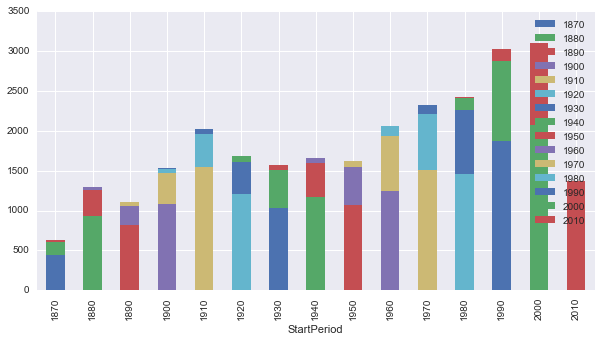

In [21]:
cohort_group_size.plot.bar(stacked=True, figsize=(10,5),linewidth=0)

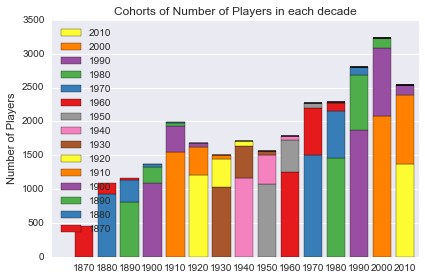

In [23]:
meh = cohort_group_size.T
x = range(len(meh))
#y_offset = np.array([0.0] * len(cohort_group_size))
y_offset = np.zeros(15)
n_rows = len(meh)

bar_width = 8
tick_pos = [i+(bar_width/2) for i in meh.index]

pal = sns.color_palette("Set1", 15)
for row,x,i in zip(reversed(meh.index), reversed(meh.index),reversed(range(15))):
    plt.bar(meh.index, meh[row], bar_width, bottom= y_offset, color =pal[i])
    y_offset = y_offset + meh[row]

values = np.arange(1870,2011,10)
value_increment = 1

plt.subplots_adjust(left=0.01, bottom=0.01)
plt.ylabel('Number of Players')

frame1 = plt.gca()
plt.legend(meh.index[::-1],loc='upper left')
plt.xticks(tick_pos,meh.index)
plt.grid(b=None, which='major', axis='x')
plt.title('Cohorts of Number of Players in each decade')
plt.tight_layout()
plt.savefig('./figures/cohort.png')
plt.show()

### Cohorts of Number of Players in each decade

In [24]:
y=cohort_group_size
ll=y/y.sum(axis=0).astype(float) * 100 

In [25]:
for decade in ll.index: 
    
    ll[decade] = np.where(ll[decade],
                             ll[decade],
                             np.nan)
ll

,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
StartPeriod,,,,,,,,,,,,,,,
1870,100.0,14.246324,2.480753,0.146306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1880,NaN,85.753676,27.972626,2.706657,0.201410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1890,NaN,NaN,69.546621,17.849305,2.567976,0.059488,0.066269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900,NaN,NaN,NaN,79.297732,19.385700,3.331350,0.265076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1910,NaN,NaN,NaN,NaN,77.844914,24.866151,4.174950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,NaN,NaN,NaN,NaN,NaN,71.743010,26.706428,4.161782,0.063980,NaN,NaN,NaN,NaN,NaN,NaN
1930,NaN,NaN,NaN,NaN,NaN,NaN,68.787276,27.373974,4.158669,0.167973,NaN,NaN,NaN,NaN,NaN
1940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.464244,27.319258,3.415454,0.043937,0.043840,NaN,NaN,NaN
1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.458093,26.371781,3.383128,0.131521,NaN,NaN,NaN


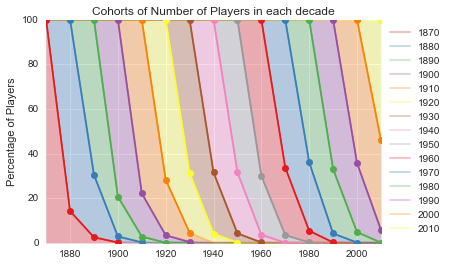

In [28]:
fig=plt.figure()
offset = np.zeros_like(ll.T[1870])
pal = sns.color_palette("Set1", 15)
ll.T.plot(kind='area',stacked=True,color=pal,alpha=0.3)
for c,i in zip(ll.T.columns,range(len(ll.index))):
    plt.plot(ll.T.index, ll.T[c] + offset, marker='o',color=pal[i])
    offset += ll.T[c].fillna(0)
#ll.T.plot(stacked=True,marker='o',ax=ax,color=pal, alpha=0.1)
plt.legend(ll.columns,bbox_to_anchor=(1, 0.5),loc='center left')
plt.ylim(0,100)
plt.ylabel('Percentage of Players')
plt.title('Cohorts of Number of Players in each decade')
plt.savefig('./figures/cohort2.png')
plt.show()